In [76]:
import pandas as pd 
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk.sentiment.util import * 
from textblob import TextBlob 
from nltk import tokenize

df = pd.read_csv('https://raw.githubusercontent.com/Cris2405/Analisis-de-Sentimientos/main/Iphone.csv')
#,error_bad_lines=False)
df

,producto,pais,comentario,calificacion,perfil,titulo_comentario
0,Apple iPhone XR (64GB),India,NOTE,3.0,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X..."
1,Apple iPhone XR (64GB),India,Very bad experience with this iPhone xr phone....,1.0,Amazon Customer,Don't buy iPhone xr from Amazon.
2,Apple iPhone XR (64GB),India,Amazing phone with amazing camera coming from ...,5.0,A,Happy with the purchase
3,Apple iPhone XR (64GB),India,So I got the iPhone XR just today. The product...,1.0,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...
4,Apple iPhone XR (64GB),India,I've been an android user all my life until I ...,5.0,Nepuni Lokho,Excellent Battery life and buttery smooth UI
...,...,...,...,...,...,...
4987,Apple iPhone XR (64GB),India,Dhamaka,4.0,Shreya,Dhamaka phone
4988,Apple iPhone XR (64GB),India,Goodbye,4.0,murali hv,Good
4989,Apple iPhone XR (64GB),India,Nothing,5.0,Manish,Fantabulous phone. Easy to use.
4990,Apple iPhone XR (64GB),India,Superbb,5.0,basil john p,Fantastic


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py 
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
%matplotlib inline

color = sns.color_palette()
py.init_notebook_mode(connected=True)

fig = px.histogram(df, x="calificacion")
fig.update_layout(title_text = "Calificación del Producto")
fig.show()

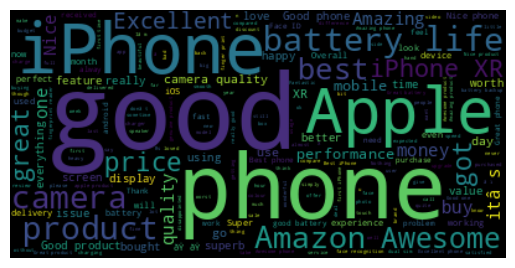

In [78]:
import nltk 
from nltk.corpus import stopwords 
import wordcloud 
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
df = df.astype(str)
text = " ".join(review for review in df.comentario)
wordcloud = WordCloud(stopwords=stopwords).generate(text) 
plt.imshow(wordcloud, interpolation = 'bilinear') 
plt.axis("off")
plt.show()

In [79]:
df = df[df['calificacion']!=3]
df['calificacion'] = df['calificacion'].astype(float)
df['sentiment'] = df['calificacion'].apply(lambda rating: +1 if rating > 3 else -1)
df

,producto,pais,comentario,calificacion,perfil,titulo_comentario,sentiment
0,Apple iPhone XR (64GB),India,NOTE,3.0,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X...",-1
1,Apple iPhone XR (64GB),India,Very bad experience with this iPhone xr phone....,1.0,Amazon Customer,Don't buy iPhone xr from Amazon.,-1
2,Apple iPhone XR (64GB),India,Amazing phone with amazing camera coming from ...,5.0,A,Happy with the purchase,1
3,Apple iPhone XR (64GB),India,So I got the iPhone XR just today. The product...,1.0,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...,-1
4,Apple iPhone XR (64GB),India,I've been an android user all my life until I ...,5.0,Nepuni Lokho,Excellent Battery life and buttery smooth UI,1
...,...,...,...,...,...,...,...
4987,Apple iPhone XR (64GB),India,Dhamaka,4.0,Shreya,Dhamaka phone,1
4988,Apple iPhone XR (64GB),India,Goodbye,4.0,murali hv,Good,1
4989,Apple iPhone XR (64GB),India,Nothing,5.0,Manish,Fantabulous phone. Easy to use.,1
4990,Apple iPhone XR (64GB),India,Superbb,5.0,basil john p,Fantastic,1


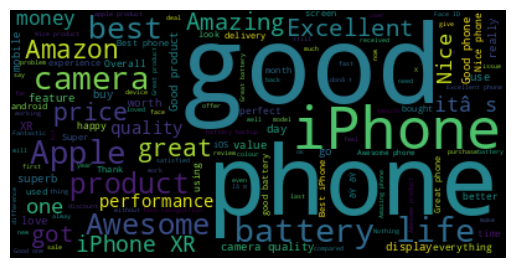

In [80]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

stopwords = set(STOPWORDS) 
df['comentario'] = df['comentario'].astype(str)
pos = " ".join(review for review in positive.comentario)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off") 
plt.savefig('positive.png')
plt.show()

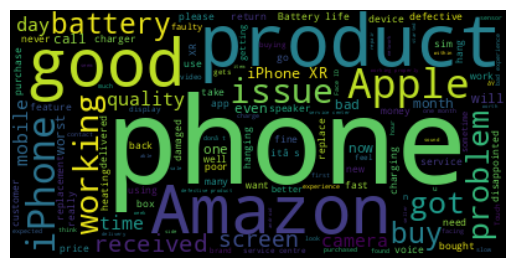

In [81]:
neg = " ".join(str(review) for review in negative.comentario)
wordcloud3= WordCloud(stopwords=stopwords).generate(neg) 
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off") 
plt.savefig('negative.png')
plt.show()

In [82]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentiment'].replace({1 : 'positive'})
fig = px.histogram(df,x="sentiment")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',marker_line_width=1.5) 
fig.update_layout(title_text='Product Sentiment')
fig.show()